<h1><center>Classifying Hand Gestures Through Muscle Activity</center></h1>

#### <div style="text-align: right"> Team Members: Hamilton Pitlik, John Ligon, Rejoice Thomas</div>

# Introduction To Dataset

The dataset used in this project represents muscle activity related to hand gestures. The dataset consists of raw EMG data collected using a MYO armband. The MYO armband when worn records muscle activity in the form of raw EMG data from 8 sensors. Participants wore the armband around their forearm and held one of four hand gestures; rock, paper, scissors, or okay hand sign. Each row of data within the data set represents one full recording. Each full recording was measured over 40 ms and consists of 8-time readings, each time reading occurring over 5ms, for each of the 8 sensors used, totaling 64 readings in a full recording. Each recording is labeled with the hand gesture that was made in said recording. This is a balanced dataset as there are similar number of samples for each gesture.

This dataset was obtained from Kaggle. The link to it - https://www.kaggle.com/kyr7plus/emg-4. 

# Problem

We aim to investigate whether muscle activity from the forearm may be used in order to classify hand gestures, thus making it a classification problem. The overall goal of this project is to construct a model which when provided with muscle activity from the forearm will correctly classify the hand gesture that this muscle activity would create. The practical applications of this project stem into the field of artificial limbs, as the ability to classify hand gesture from forearm activity is critical in the development of functional prosthetics.


# Visualization

The first task of this project was to understand our data through visualization. While the method of measuring muscle activity was known, we were unsure whether readings were generated by actively making the gesture or if the gesture was held and then muscle activity was recorded. Our initial approach was to plot the min and max values at each sensor for each gesture to determine whether movement was occuring or not.

Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
from scipy import signal
from sklearn.decomposition import PCA, FastICA
from sklearn.model_selection import train_test_split
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras import optimizers

Using TensorFlow backend.


Downloading the datasets

In [2]:
csv0 = pd.read_csv("0.csv", header = None)
csv1 = pd.read_csv("1.csv", header = None)
csv2 = pd.read_csv("2.csv", header = None)
csv3 = pd.read_csv("3.csv", header = None)

Making copies

In [3]:
cs0=csv0.copy(deep=True)
cs1=csv1.copy(deep=True)
cs2=csv2.copy(deep=True)
cs3=csv3.copy(deep=True)

Naming the columns

In [4]:
num_cols = len(list(csv0)) # get length of columns

rng = range(1, (num_cols + 1))

cs0.columns = ['x' + str(i) for i in rng]
cs1.columns = ['x' + str(i) for i in rng]
cs2.columns = ['x' + str(i) for i in rng]
cs3.columns = ['x' + str(i) for i in rng]

Separating the response variable

In [5]:
y_cs0 = cs0['x65']
y_cs1 = cs1['x65']
y_cs2 = cs2['x65']
y_cs3 = cs3['x65']

For each csv separately, we are going to create sensorwise data. We will concatenate all the readings (from the same row) for each sensor and separating the dataframes sensorwise. We can keep this in variables to use them later, if needed, in graphical viewing.


In [6]:
#Creating a range to put in the for loop. This would act as reference to name of the columns.
s1=range(1, 58, 8)
s2=range(2, 59, 8)
s3=range(3, 60, 8)
s4=range(4, 61, 8)
s5=range(5, 62, 8)
s6=range(6, 63, 8)
s7=range(7, 64, 8)
s8=range(8, 65, 8)

#Creating the sensorwise data
sensor01 = cs0.loc[:,['x'+str(i) for i in s1]] #action 0 & sensor 1
sensor02 = cs0.loc[:,['x'+str(i) for i in s2]] #action 0 & sensor 2
sensor03 = cs0.loc[:,['x'+str(i) for i in s3]] #action 0 & sensor 3          
sensor04 = cs0.loc[:,['x'+str(i) for i in s4]] #action 0 & sensor 4
sensor05 = cs0.loc[:,['x'+str(i) for i in s5]] #action 0 & sensor 5
sensor06 = cs0.loc[:,['x'+str(i) for i in s6]] #action 0 & sensor 6
sensor07 = cs0.loc[:,['x'+str(i) for i in s7]] #action 0 & sensor 7
sensor08 = cs0.loc[:,['x'+str(i) for i in s8]] #action 0 & sensor 8

sensor11 = cs1.loc[:,['x'+str(i) for i in s1]] #action 1 and sensor 1
sensor12 = cs1.loc[:,['x'+str(i) for i in s2]] #action 1 and sensor 2
sensor13 = cs1.loc[:,['x'+str(i) for i in s3]] #action 1 and sensor 3
sensor14 = cs1.loc[:,['x'+str(i) for i in s4]]
sensor15 = cs1.loc[:,['x'+str(i) for i in s5]]
sensor16 = cs1.loc[:,['x'+str(i) for i in s6]]
sensor17 = cs1.loc[:,['x'+str(i) for i in s7]]
sensor18 = cs1.loc[:,['x'+str(i) for i in s8]] #action 1 and sensor 8

sensor21 = cs2.loc[:,['x'+str(i) for i in s1]] #action 2 and sensor 1
sensor22 = cs2.loc[:,['x'+str(i) for i in s2]] #action 2 and sensor 2
sensor23 = cs2.loc[:,['x'+str(i) for i in s3]]
sensor24 = cs2.loc[:,['x'+str(i) for i in s4]]
sensor25 = cs2.loc[:,['x'+str(i) for i in s5]]
sensor26 = cs2.loc[:,['x'+str(i) for i in s6]]
sensor27 = cs2.loc[:,['x'+str(i) for i in s7]]
sensor28 = cs2.loc[:,['x'+str(i) for i in s8]] #action 2 and sensor 8

sensor31 = cs3.loc[:,['x'+str(i) for i in s1]] #action 3 and sensor 1
sensor32 = cs3.loc[:,['x'+str(i) for i in s2]] #action 3 and sensor 2
sensor33 = cs3.loc[:,['x'+str(i) for i in s3]]
sensor34 = cs3.loc[:,['x'+str(i) for i in s4]]
sensor35 = cs3.loc[:,['x'+str(i) for i in s5]]
sensor36 = cs3.loc[:,['x'+str(i) for i in s6]]
sensor37 = cs3.loc[:,['x'+str(i) for i in s7]]
sensor38 = cs3.loc[:,['x'+str(i) for i in s8]] #action 3 and sensor 8

We will now convert the above dataframes into a flattened list so that we are able to plot the graphs.

In [7]:
#For sensor 1
list01=sensor01.values.tolist()   #Convert dataframe to list of lists - action 0, sensor 1
flist01 = [item for sublist in list01 for item in sublist] #Converting list of lists to flattened list

list11=sensor11.values.tolist() #action 1, sensor 1
flist11 = [item for sublist in list11 for item in sublist]

list21=sensor21.values.tolist() #action 2, sensor 1
flist21 = [item for sublist in list21 for item in sublist]

list31=sensor31.values.tolist() #action 3, sensor 1
flist31 = [item for sublist in list31 for item in sublist]

#For sensor 2
list02=sensor02.values.tolist()   #Convert dataframe to list of lists - action 0, sensor 2
flist02 = [item for sublist in list02 for item in sublist] #Converting list of lists to flattened list

list12=sensor12.values.tolist() #action 1, sensor 2
flist12 = [item for sublist in list12 for item in sublist]

list22=sensor22.values.tolist() #action 2, sensor 2
flist22 = [item for sublist in list22 for item in sublist]

list32=sensor32.values.tolist() #action 3, sensor 2
flist32 = [item for sublist in list32 for item in sublist]

#For sensor 3
list03=sensor03.values.tolist()   #Convert dataframe to list of lists - action 0, sensor 3
flist03 = [item for sublist in list03 for item in sublist] #Converting list of lists to flattened list

list13=sensor13.values.tolist() #action 1, sensor 3
flist13 = [item for sublist in list13 for item in sublist]

list23=sensor23.values.tolist()#action 2, sensor 3
flist23 = [item for sublist in list23 for item in sublist]

list33=sensor33.values.tolist()#action 3, sensor 3
flist33 = [item for sublist in list33 for item in sublist]

#For sensor 4
list04=sensor04.values.tolist()   #Convert dataframe to list of lists - action 0, sensor 4
flist04 = [item for sublist in list04 for item in sublist] #Converting list of lists to flattened list

list14=sensor14.values.tolist() #action 1, sensor 4
flist14 = [item for sublist in list14 for item in sublist]

list24=sensor24.values.tolist()#action 2, sensor 4
flist24 = [item for sublist in list24 for item in sublist]

list34=sensor34.values.tolist() #action 3, sensor 4
flist34 = [item for sublist in list34 for item in sublist]

#For sensor 5
list05=sensor05.values.tolist()   #Convert dataframe to list of lists - action 0, sensor 5
flist05 = [item for sublist in list05 for item in sublist] #Converting list of lists to flattened list

list15=sensor15.values.tolist() #action 1, sensor 5
flist15 = [item for sublist in list15 for item in sublist]

list25=sensor25.values.tolist() #action 2, sensor 5
flist25 = [item for sublist in list25 for item in sublist]

list35=sensor35.values.tolist() #action 2, sensor 5
flist35 = [item for sublist in list35 for item in sublist]

#For sensor 6
list06=sensor06.values.tolist()   #Convert dataframe to list of lists - action 0, sensor 6
flist06 = [item for sublist in list06 for item in sublist] #Converting list of lists to flattened list

list16=sensor16.values.tolist() #action 1, sensor 6
flist16 = [item for sublist in list16 for item in sublist]

list26=sensor26.values.tolist() #action 2, sensor 6
flist26 = [item for sublist in list26 for item in sublist]

list36=sensor36.values.tolist() #action 3, sensor 6
flist36 = [item for sublist in list36 for item in sublist]

#For sensor 7
list07=sensor07.values.tolist()   #Convert dataframe to list of lists - action 0, sensor 7
flist07 = [item for sublist in list07 for item in sublist] #Converting list of lists to flattened list

list17=sensor17.values.tolist() #action 1, sensor 7
flist17 = [item for sublist in list17 for item in sublist]

list27=sensor27.values.tolist() #action 2, sensor 7
flist27 = [item for sublist in list27 for item in sublist]

list37=sensor37.values.tolist() #action 3, sensor 7
flist37 = [item for sublist in list37 for item in sublist]

#For sensor 8
list08=sensor08.values.tolist()   #Convert dataframe to list of lists - action 0, sensor 8
flist08 = [item for sublist in list08 for item in sublist] #Converting list of lists to flattened list

list18=sensor18.values.tolist() #action 1, sensor 8
flist18 = [item for sublist in list18 for item in sublist]

list28=sensor28.values.tolist() #action 2, sensor 8
flist28 = [item for sublist in list28 for item in sublist]

list38=sensor38.values.tolist() #action 3, sensor 8
flist38 = [item for sublist in list38 for item in sublist]

We will now merge all the sensor 1 data across actions too. So now we have just the sensor 1 data across all actions.

In [8]:
flist1=flist01+flist11+flist21+flist31 #Merging all of sensor 1 data. The first set is action 0, then action 1, then 2, then 3..
flist2=flist02+flist12+flist22+flist32 #Merging all of sensor 2 data. The first set is action 0, then action 1, then 2, then 3..
flist3=flist03+flist13+flist23+flist33
flist4=flist04+flist14+flist24+flist34
flist5=flist05+flist15+flist25+flist35
flist6=flist06+flist16+flist26+flist36
flist7=flist07+flist17+flist27+flist37 #Merging all of sensor 7 data. The first set is action 0, then action 1, then 2, then 3..
flist8=flist08+flist18+flist28+flist38 #Merging all of sensor 8 data. The first set is action 0, then action 1, then 2, then 3..
sensors = (flist1,flist2,flist3,flist4,flist5,flist6,flist7,flist8) #list conatining all sensor data

Visualizing signals against each sensor

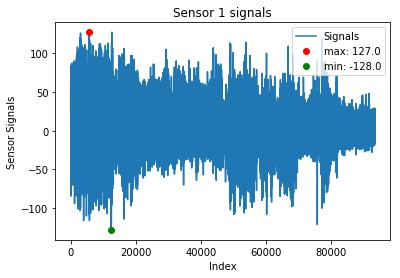

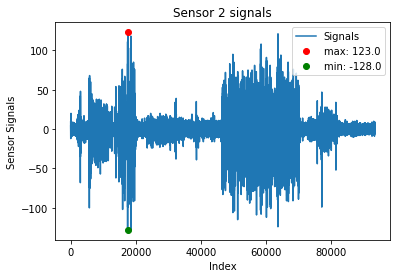

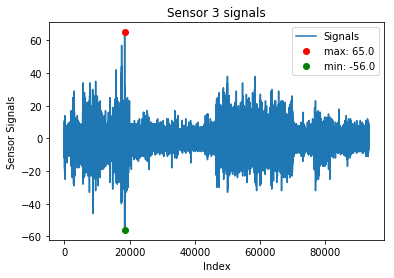

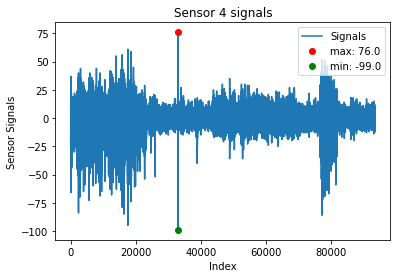

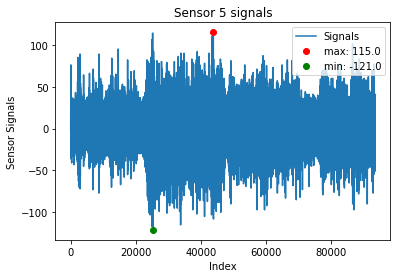

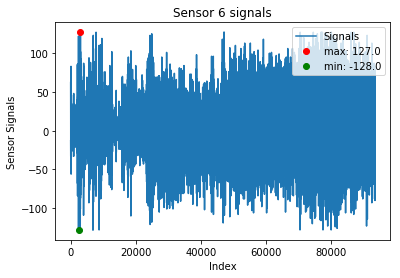

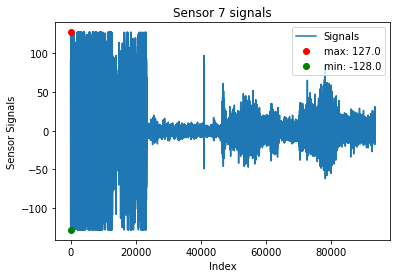

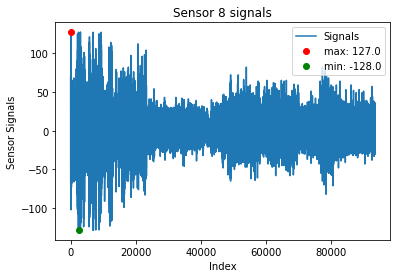

In [9]:
index=range(1,93425) #For x axis
for i in range(8): #plots 8 graphs, one for each sensor, and activity 
    plt.plot(index,sensors[i],label='Signals')
    plt.plot(sensors[i].index(max(sensors[i])), max(sensors[i]), 'ro', label='max: ' + str(max(sensors[i])))
    plt.plot(sensors[i].index(min(sensors[i])), min(sensors[i]), 'go', label='min: ' + str(min(sensors[i])))
    plt.title('Sensor ' +str(i+1)+ ' signals')
    plt.xlabel("Index")
    plt.ylabel("Sensor Signals")
    plt.legend(loc="upper right")
    plt.show()

Plotting Max and Min values at each sensor

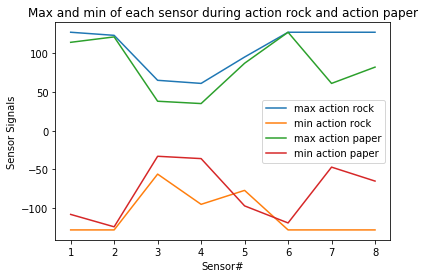

In [10]:
ys01=[max(flist01),max(flist02),max(flist03),max(flist04),max(flist05),max(flist06),max(flist07),max(flist08)]
ys02=[min(flist01),min(flist02),min(flist03),min(flist04),min(flist05),min(flist06),min(flist07),min(flist08)]
ys21=[max(flist21),max(flist22),max(flist23),max(flist24),max(flist25),max(flist26),max(flist27),max(flist28)]
ys22=[min(flist21),min(flist22),min(flist23),min(flist24),min(flist25),min(flist26),min(flist27),min(flist28)]
xs=range(1,9)

plt.plot(xs,ys01,label='max action rock')
plt.plot(xs,ys02,label='min action rock')
plt.plot(xs,ys21,label='max action paper')
plt.plot(xs,ys22,label='min action paper')
plt.title('Max and min of each sensor during action rock and action paper')
plt.xlabel("Sensor#")
plt.ylabel("Sensor Signals")
plt.legend(loc="best")
plt.show()

When evaluating signals across sensors three features were observed: 
- High activity across all gestures
- High activity only in specific gestures
- Random outliers
The max and min values for actions rock and paper were plotted for each sensor in order to visualize if there was some relationship that existed in order to determine gesture movement. Unfortunatelly, without the input of a domain expert, we were unable to conclude whether gestures had been measured while moving or held still. We then turned towards literature and demonstrations of the myoArmband in order to resolve this issue.

In the video that the image below was sourced from, a participant made and held various hand gestures while wearing the myoArmband. We observed that the action rock had stronger signals compared to action paper. It matched our intuition that a person displaying the action paper isn't straining thier muscles as much as they strain it while doing action rock which corresponds to difference in strength of signals. Using this intuition, plots of sensor activity for actions rock and paper were generated. These plots, found below were compared to the muscle activity graphs visible in the video. The plots matched to what are intuition was and we concluded that our data must have been measured from individulas holding a gesture and not movements. 

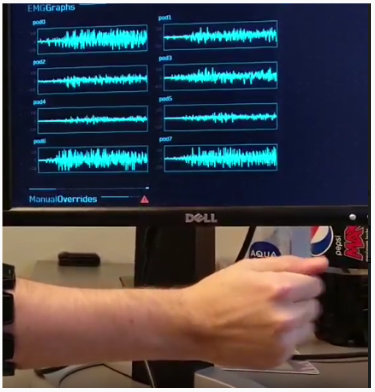

In [2]:
#myoarmband demonstration from https://youtu.be/g1XcCmjAf-w
from IPython.display import Image
Image(filename="rock_gesture.png")

Concatenated sensors separated by action

In [12]:
action0 = (flist01,flist02,flist03,flist04,flist05,flist06,flist07,flist08)
action1 = (flist11,flist12,flist13,flist14,flist15,flist16,flist17,flist18)
action2 = (flist21,flist22,flist23,flist24,flist25,flist26,flist27,flist28)
action3 = (flist31,flist32,flist33,flist34,flist35,flist36,flist37,flist38)

Plotting signals against actions rock and paper to compare signal strength

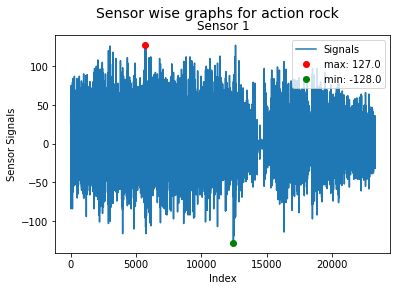

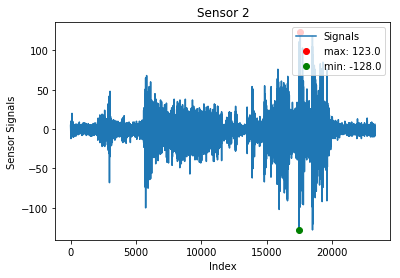

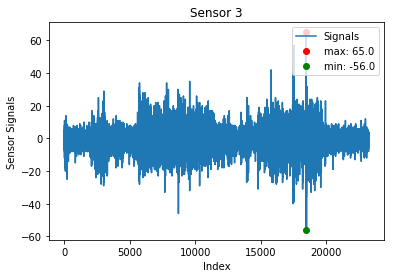

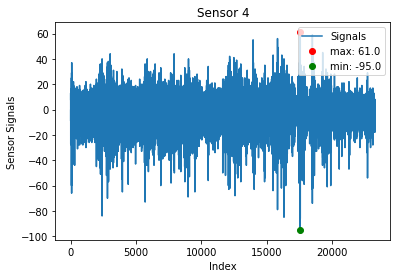

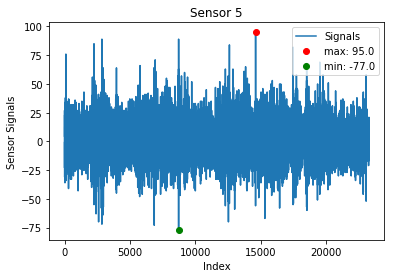

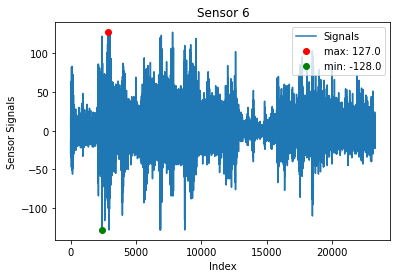

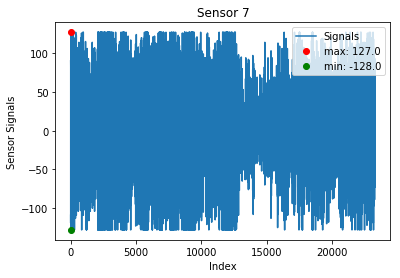

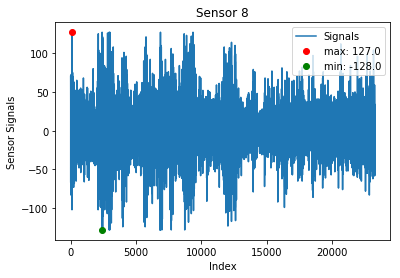

In [13]:
index=range(1,23281) #For x axis

plt.suptitle('Sensor wise graphs for action rock',fontsize=14)
for i in range(8):
    plt.plot(index,action0[i],label='Signals')
    plt.plot(action0[i].index(max(action0[i])), max(action0[i]), 'ro', label='max: ' + str(max(action0[i])))
    plt.plot(action0[i].index(min(action0[i])), min(action0[i]), 'go', label='min: ' + str(min(action0[i])))
    plt.title('Sensor '+ str(i+1))
    plt.xlabel("Index")
    plt.ylabel("Sensor Signals")
    plt.legend(loc="upper right")
    plt.show()

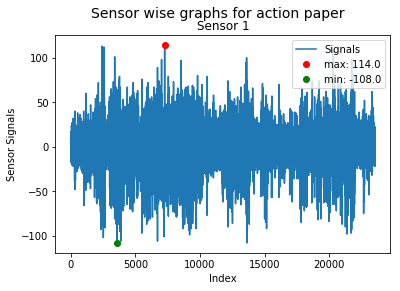

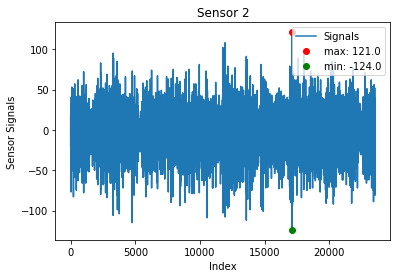

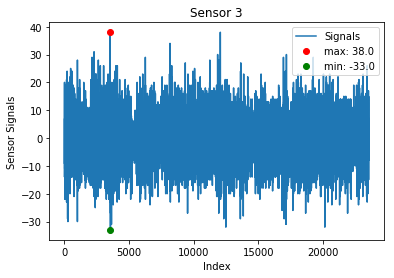

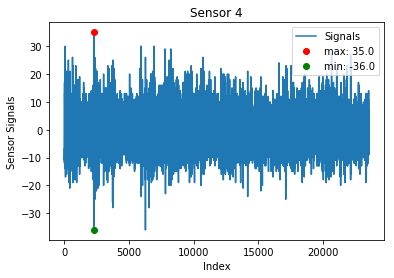

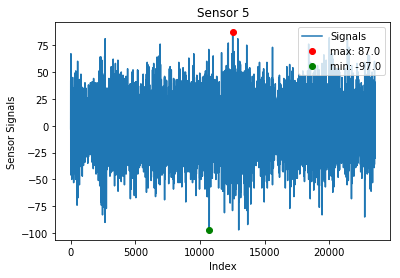

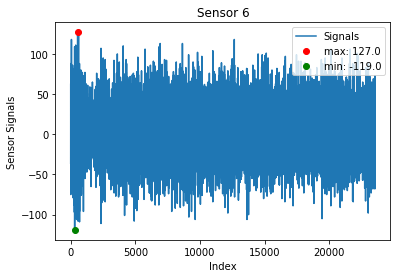

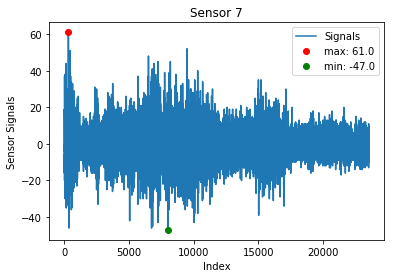

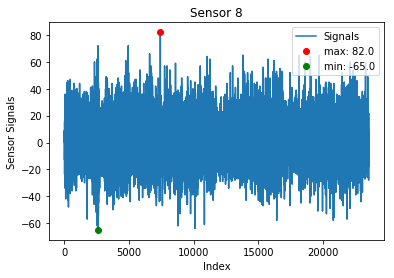

In [14]:
index=range(1,23545) #For x axis

plt.suptitle('Sensor wise graphs for action paper',fontsize=14)

for i in range(8):
    plt.plot(index,action2[i],label='Signals')
    plt.plot(action2[i].index(max(action2[i])), max(action2[i]), 'ro', label='max: ' + str(max(action2[i])))
    plt.plot(action2[i].index(min(action2[i])), min(action2[i]), 'go', label='min: ' + str(min(action2[i])))
    plt.title('Sensor '+ str(i+1))
    plt.xlabel("Index")
    plt.ylabel("Sensor Signals")
    plt.legend(loc="upper right")
    plt.show()

Now that we are able to conclude muscle activity had been measured while the gesture was held stil, we will move on to the application of pre-processing techniques.

# Pre-processing

An intuition that the normal pre-processing like removing outliers would not work well here. We needed a reference or atleast view it in time or frequency domain and then decide what is noise.

Different ways of pre-processing for EMG -
- Applying simple analog or digital filters
- Dimensionality reduction techniques like PCA
- Signal-to-noise ratio improving techniques, e.g. Common Spatial Patterns (CSP)

Before we select a pre-processing technique let's try to understand what is EMG to be able to know what noise are we dealing with and what pre-processing technique could best help our case.

What is EMG?
- EMG is an experimental and clinical technique used to study and analyse electrical signals produced by muscles. The smallest functional unit that describes how a muscle contracts. The motor unit consists of the cell body and axon of a motor neurone and the muscle fibres it innervates. Each muscle fibre is enclosed in a cell membrane surrounded by electrically charged particles (sodium and potassium ions).

- The difference in concentration of ions sets up a potential difference across the muscle cell membrane which gives rise to an action potential. It can be thought of like an electrical force which leads to depolarizing which leads to an action potential which we use for EMG.

Problems with the signals:
- Baseline EMG values have an offset from zero
- Baseline EMG values are noisy
- The EMG potential difference swings from negative to positive values

Solutions to the problems:
- Removing the mean value from the signal
- Filter the signal
- Rectify the signal

We will first attempt to remove the mean from the signal. We are expecting to see an outcome similar to the below stock image.

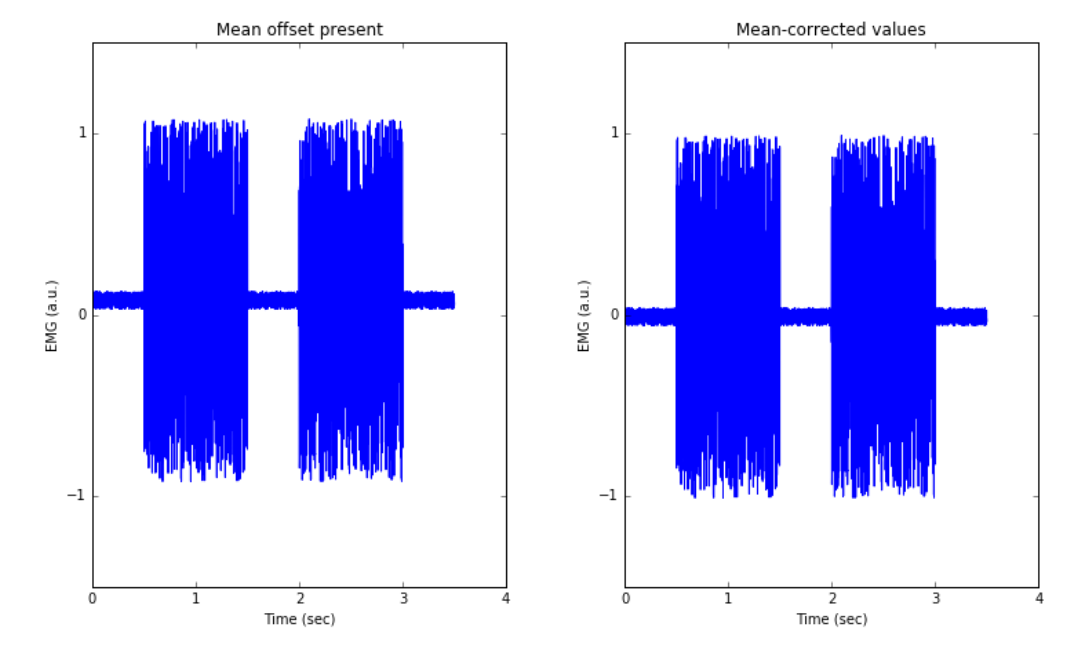

In [15]:
from IPython.display import Image
Image(filename="mean_corrected.png")

We will now see if we get a similar outcome when we remove the mean from our dataset. Let's check this out only for action 0 and sensor 1 for all samples first before we apply to the whole dataset.

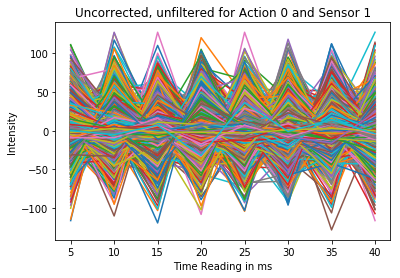

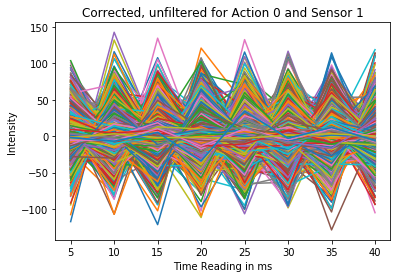

In [16]:
x = (5,10,15,20,25,30,35,40)
for i in range(sensor01.shape[0]):
    y = sensor01.iloc[i,:]
    plt.plot(x, y)
plt.title('Uncorrected, unfiltered for Action 0 and Sensor 1')
plt.xlabel('Time Reading in ms')
plt.ylabel('Intensity')
plt.show()


for i in range(sensor01.shape[0]):
    y = sensor01.iloc[i,:]
    meany=np.mean(y)
    corry=y-meany
    plt.plot(x, corry)
plt.plot(x, corry)
plt.title('Corrected, unfiltered for Action 0 and Sensor 1')
plt.xlabel('Time Reading in ms')
plt.ylabel('Intensity')
plt.show()

It doesn't seem to have made a difference. Let us check by averaging the values for the same action and sensor across all samples and then see if it did make a difference.

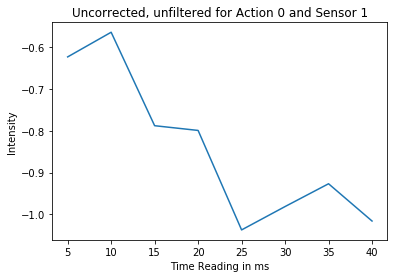

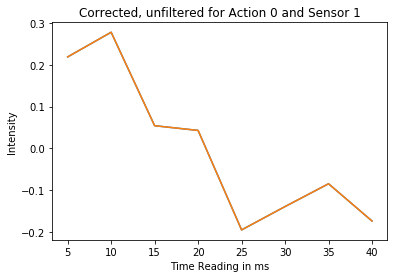

In [17]:
x = (5,10,15,20,25,30,35,40)
y = sensor01.mean(axis=0)
plt.plot(x, y)
plt.title('Uncorrected, unfiltered for Action 0 and Sensor 1')
plt.xlabel('Time Reading in ms')
plt.ylabel('Intensity')
plt.show()


y = sensor01.mean(axis=0)
meany=np.mean(y)
corry=y-meany
plt.plot(x, corry)
plt.plot(x, corry)
plt.title('Corrected, unfiltered for Action 0 and Sensor 1')
plt.xlabel('Time Reading in ms')
plt.ylabel('Intensity')
plt.show()

It does seem to have made a difference as we have seen in the graphs. So we can apply this to the entire dataset.

Before we remove the mean from the entire dataset let's look at the filtering process too. We are looking for a similar outcome as the below stock image.

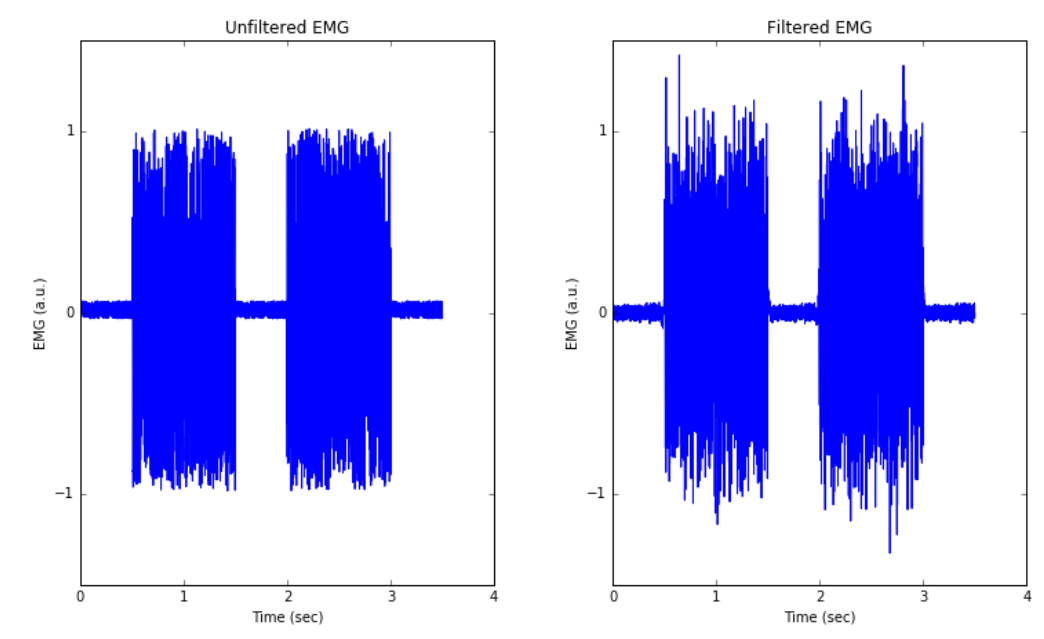

In [18]:
from IPython.display import Image
Image(filename="filtered.png")

We see a lot of spikes in the filtered image which we don't see in the unfiltered one. This spikes could probably be because the noise is removed.

We will now create high and low pass filter settings. A ‘high pass’ filter lets frequencies above that cut-off value pass through, while a ‘low pass’ filter lets frequencies below that cut-off value pass through. Raw surface EMG typically has a frequency content of between 6-500 Hz, with the greatest spectral power between 20-150 Hz. In this case, as the sampling rate is 200 Hz we need to visually look at each graph and come with adequate values for the filters. Slow oscillations in the EMG signal are likely due to movement artefacts and fast oscillations are often due to unwanted electrical noise.

The sp.signal.butter command requires values between 0 and 1, so filter frequencies are normalised to the Nyquist frequency, which is half of the sampling rate.

The scipy butter function is used to design an Nth order Butterworth filter and return the filter coefficients in (B,A) form. So, we specify we want to create a 4th order bandpass filter ([high, low], btype='bandpass'). The order of a filter refers to how well the filter includes wanted frequencies and excludes unwanted frequencies. 4th order Butterworth filters are quite common; the filter order relates to how well the filter attenuates unwanted frequencies outside the selected cut-off frequency.

The scipy filtfilt function is used to apply a linear filter to the signal one time forward, one time backwards. Applying a filter to a signal causes a frequency-dependent phase shift. While this phase shift is unavoidable when applying an analog (ie. hardware) filter, the phase shift can be corrected by applying the digital filter backwards. 

So, let's look at the graph for action 0 and sensor 1 and try to find adequate filters for it.

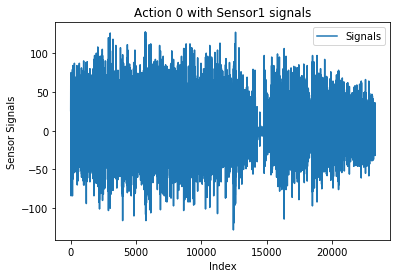

In [19]:
plt.plot(range(1,len(flist01)+1),flist01,label='Signals')
plt.title('Action 0 with Sensor1 signals')
plt.xlabel("Index")
plt.ylabel("Sensor Signals")
plt.legend(loc="upper right")
plt.show()

We can see that the signals are stronger throughout. We don't seem to see a lot of variations that we can remove. So we will try to keep the maximum from these signals. Let's select the values 20 and 90 and see how it shows up.

C:\Users\rejoi\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


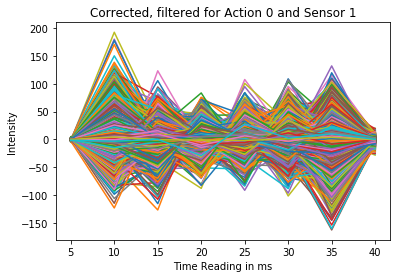

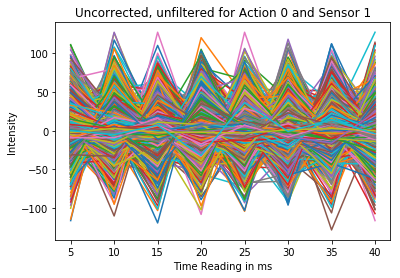

In [20]:
# create bandpass filter for EMG
high = 20/(200/2)
low = 90/(200/2)
b, a = sp.signal.butter(4, [high,low], btype='bandpass')

new_sensor01 = pd.DataFrame(index=range(sensor01.shape[0]), columns=sensor01.columns)

# process EMG signal: filter EMG
x = (5,10,15,20,25,30,35,40)
for i in range(sensor01.shape[0]):
    y = sensor01.iloc[i,:]
    meany=np.mean(y)
    corry=y-meany
    filteredy = sp.signal.filtfilt(b, a, corry,padlen=7)
    for j in range(filteredy.shape[0]):
        new_sensor01.iloc[i,j]=filteredy[j]
    plt.plot(x, filteredy)
plt.title('Corrected, filtered for Action 0 and Sensor 1')
plt.xlabel('Time Reading in ms')
plt.ylabel('Intensity')
plt.show()

for i in range(sensor01.shape[0]):
    y = sensor01.iloc[i,:]
    plt.plot(x, y)
plt.title('Uncorrected, unfiltered for Action 0 and Sensor 1')
plt.xlabel('Time Reading in ms')
plt.ylabel('Intensity')
plt.show()

There is a clear difference in the graphs. We will apply the same process of looking at each graph and then selecting the apt frequencies for each action and sensor.

#### For action 1 and sensor 1..

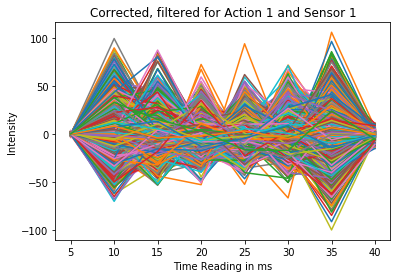

In [21]:
x = (5,10,15,20,25,30,35,40)
# create bandpass filter for EMG
high = 20/(200/2)
low = 90/(200/2)
b, a = sp.signal.butter(4, [high,low], btype='bandpass')

new_sensor11 = pd.DataFrame(index=range(sensor11.shape[0]), columns=sensor11.columns)

# process EMG signal: filter EMG
for i in range(sensor11.shape[0]):
    y = sensor11.iloc[i,:]
    meany=np.mean(y)
    corry=y-meany
    filteredy = sp.signal.filtfilt(b, a, corry,padlen=7)
    for j in range(filteredy.shape[0]):
        new_sensor11.iloc[i,j]=filteredy[j]
    plt.plot(x, filteredy)
plt.title('Corrected, filtered for Action 1 and Sensor 1')
plt.xlabel('Time Reading in ms')
plt.ylabel('Intensity')
plt.show()

#### For action 2 and sensor 1..

In [22]:
# create bandpass filter for EMG
high = 20/(200/2)
low = 90/(200/2)
b, a = sp.signal.butter(4, [high,low], btype='bandpass')

new_sensor21 = pd.DataFrame(index=range(sensor21.shape[0]), columns=sensor21.columns)

# process EMG signal: filter EMG
for i in range(sensor21.shape[0]):
    y = sensor21.iloc[i,:]
    meany=np.mean(y)
    corry=y-meany
    filteredy = sp.signal.filtfilt(b, a, corry,padlen=7)
    for j in range(filteredy.shape[0]):
        new_sensor21.iloc[i,j]=filteredy[j]

#### For action 3 and sensor 1..

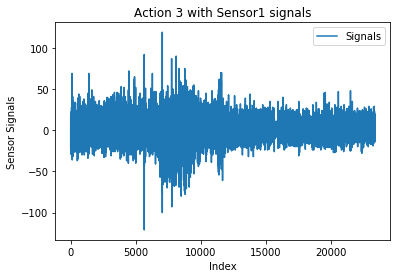

In [23]:
plt.plot(range(1,len(flist31)+1),flist31,label='Signals')
plt.title('Action 3 with Sensor1 signals')
plt.xlabel("Index")
plt.ylabel("Sensor Signals")
plt.legend(loc="upper right")
plt.show()

For action 3 and sensor 1 the signals are generally quite weak. Here we will change the range for high pass and low pass and use only the signals that are useful for us.

In [24]:
# create bandpass filter for EMG
high = 20/(200/2)
low = 45/(200/2)                    #Because data visualization showed the signals are quite weak
b, a = sp.signal.butter(4, [high,low], btype='bandpass')

new_sensor31 = pd.DataFrame(index=range(sensor31.shape[0]), columns=sensor31.columns)

# process EMG signal: filter EMG
for i in range(sensor31.shape[0]):
    y = sensor31.iloc[i,:]
    meany=np.mean(y)
    corry=y-meany
    filteredy = sp.signal.filtfilt(b, a, corry,padlen=7)
    for j in range(filteredy.shape[0]):
        new_sensor31.iloc[i,j]=filteredy[j]

We will now apply the same method to all the actions under each sensor

#### For sensor 2, all the actions..

In [25]:
# create bandpass filter for EMG
high = 20/(200/2)
low = 45/(200/2)
b, a = sp.signal.butter(4, [high,low], btype='bandpass')

new_sensor02 = pd.DataFrame(index=range(sensor02.shape[0]), columns=sensor02.columns)

# process EMG signal: filter EMG
for i in range(sensor02.shape[0]):
    y = sensor02.iloc[i,:]
    meany=np.mean(y)
    corry=y-meany
    filteredy = sp.signal.filtfilt(b, a, corry,padlen=7)
    for j in range(filteredy.shape[0]):
        new_sensor02.iloc[i,j]=filteredy[j]
        
        
# create bandpass filter for EMG
high = 10/(200/2)
low = 30/(200/2)
b, a = sp.signal.butter(4, [high,low], btype='bandpass')

new_sensor12 = pd.DataFrame(index=range(sensor12.shape[0]), columns=sensor12.columns)

# process EMG signal: filter EMG
for i in range(sensor12.shape[0]):
    y = sensor12.iloc[i,:]
    meany=np.mean(y)
    corry=y-meany
    filteredy = sp.signal.filtfilt(b, a, corry,padlen=7)
    for j in range(filteredy.shape[0]):
        new_sensor12.iloc[i,j]=filteredy[j]
        
        
# create bandpass filter for EMG
high = 20/(200/2)
low = 55/(200/2)
b, a = sp.signal.butter(4, [high,low], btype='bandpass')

new_sensor22 = pd.DataFrame(index=range(sensor22.shape[0]), columns=sensor22.columns)

# process EMG signal: filter EMG
for i in range(sensor22.shape[0]):
    y = sensor22.iloc[i,:]
    meany=np.mean(y)
    corry=y-meany
    filteredy = sp.signal.filtfilt(b, a, corry,padlen=7)
    for j in range(filteredy.shape[0]):
        new_sensor22.iloc[i,j]=filteredy[j]
        
        
# create bandpass filter for EMG
high = 10/(200/2)
low = 30/(200/2)
b, a = sp.signal.butter(4, [high,low], btype='bandpass')

new_sensor32 = pd.DataFrame(index=range(sensor32.shape[0]), columns=sensor32.columns)

# process EMG signal: filter EMG
for i in range(sensor32.shape[0]):
    y = sensor32.iloc[i,:]
    meany=np.mean(y)
    corry=y-meany
    filteredy = sp.signal.filtfilt(b, a, corry,padlen=7)
    for j in range(filteredy.shape[0]):
        new_sensor32.iloc[i,j]=filteredy[j]        

#### For sensor 3..

In [26]:
# create bandpass filter for EMG
high = 10/(200/2)
low = 30/(200/2)
b, a = sp.signal.butter(4, [high,low], btype='bandpass')

new_sensor03 = pd.DataFrame(index=range(sensor03.shape[0]), columns=sensor03.columns)

# process EMG signal: filter EMG
for i in range(sensor03.shape[0]):
    y = sensor03.iloc[i,:]
    meany=np.mean(y)
    corry=y-meany
    filteredy = sp.signal.filtfilt(b, a, corry,padlen=7)
    for j in range(filteredy.shape[0]):
        new_sensor03.iloc[i,j]=filteredy[j]
        
        
# create bandpass filter for EMG
high = 10/(200/2)
low = 20/(200/2)
b, a = sp.signal.butter(4, [high,low], btype='bandpass')

new_sensor13 = pd.DataFrame(index=range(sensor13.shape[0]), columns=sensor13.columns)

# process EMG signal: filter EMG
for i in range(sensor13.shape[0]):
    y = sensor13.iloc[i,:]
    meany=np.mean(y)
    corry=y-meany
    filteredy = sp.signal.filtfilt(b, a, corry,padlen=7)
    for j in range(filteredy.shape[0]):
        new_sensor13.iloc[i,j]=filteredy[j]
        
        
# create bandpass filter for EMG
high = 10/(200/2)
low = 35/(200/2)
b, a = sp.signal.butter(4, [high,low], btype='bandpass')

new_sensor23 = pd.DataFrame(index=range(sensor23.shape[0]), columns=sensor23.columns)

# process EMG signal: filter EMG
for i in range(sensor23.shape[0]):
    y = sensor23.iloc[i,:]
    meany=np.mean(y)
    corry=y-meany
    filteredy = sp.signal.filtfilt(b, a, corry,padlen=7)
    for j in range(filteredy.shape[0]):
        new_sensor23.iloc[i,j]=filteredy[j]
        
        
# create bandpass filter for EMG
high = 10/(200/2)
low = 25/(200/2)
b, a = sp.signal.butter(4, [high,low], btype='bandpass')

new_sensor33 = pd.DataFrame(index=range(sensor33.shape[0]), columns=sensor33.columns)

# process EMG signal: filter EMG
for i in range(sensor33.shape[0]):
    y = sensor33.iloc[i,:]
    meany=np.mean(y)
    corry=y-meany
    filteredy = sp.signal.filtfilt(b, a, corry,padlen=7)
    for j in range(filteredy.shape[0]):
        new_sensor33.iloc[i,j]=filteredy[j]        

#### For sensor 4..

In [27]:
# create bandpass filter for EMG
high = 20/(200/2)
low = 40/(200/2)
b, a = sp.signal.butter(4, [high,low], btype='bandpass')

new_sensor04 = pd.DataFrame(index=range(sensor04.shape[0]), columns=sensor04.columns)

# process EMG signal: filter EMG
for i in range(sensor04.shape[0]):
    y = sensor04.iloc[i,:]
    meany=np.mean(y)
    corry=y-meany
    filteredy = sp.signal.filtfilt(b, a, corry,padlen=7)
    for j in range(filteredy.shape[0]):
        new_sensor04.iloc[i,j]=filteredy[j]
        
        
# create bandpass filter for EMG
high = 10/(200/2)
low = 35/(200/2)
b, a = sp.signal.butter(4, [high,low], btype='bandpass')

new_sensor14 = pd.DataFrame(index=range(sensor14.shape[0]), columns=sensor14.columns)

# process EMG signal: filter EMG
for i in range(sensor14.shape[0]):
    y = sensor14.iloc[i,:]
    meany=np.mean(y)
    corry=y-meany
    filteredy = sp.signal.filtfilt(b, a, corry,padlen=7)
    for j in range(filteredy.shape[0]):
        new_sensor14.iloc[i,j]=filteredy[j]
        
        
# create bandpass filter for EMG
high = 10/(200/2)
low = 35/(200/2)
b, a = sp.signal.butter(4, [high,low], btype='bandpass')

new_sensor24 = pd.DataFrame(index=range(sensor24.shape[0]), columns=sensor24.columns)

# process EMG signal: filter EMG
for i in range(sensor24.shape[0]):
    y = sensor24.iloc[i,:]
    meany=np.mean(y)
    corry=y-meany
    filteredy = sp.signal.filtfilt(b, a, corry,padlen=7)
    for j in range(filteredy.shape[0]):
        new_sensor24.iloc[i,j]=filteredy[j]
        
        
# create bandpass filter for EMG
high = 10/(200/2)
low = 35/(200/2)
b, a = sp.signal.butter(4, [high,low], btype='bandpass')

new_sensor34 = pd.DataFrame(index=range(sensor34.shape[0]), columns=sensor34.columns)

# process EMG signal: filter EMG
for i in range(sensor34.shape[0]):
    y = sensor34.iloc[i,:]
    meany=np.mean(y)
    corry=y-meany
    filteredy = sp.signal.filtfilt(b, a, corry,padlen=7)
    for j in range(filteredy.shape[0]):
        new_sensor34.iloc[i,j]=filteredy[j]        

#### For sensor 5..

In [28]:
# create bandpass filter for EMG
high = 20/(200/2)
low = 55/(200/2)
b, a = sp.signal.butter(4, [high,low], btype='bandpass')

new_sensor05 = pd.DataFrame(index=range(sensor05.shape[0]), columns=sensor05.columns)

# process EMG signal: filter EMG
for i in range(sensor05.shape[0]):
    y = sensor05.iloc[i,:]
    meany=np.mean(y)
    corry=y-meany
    filteredy = sp.signal.filtfilt(b, a, corry,padlen=7)
    for j in range(filteredy.shape[0]):
        new_sensor05.iloc[i,j]=filteredy[j]
        
        
# create bandpass filter for EMG
high = 20/(200/2)
low = 90/(200/2)
b, a = sp.signal.butter(4, [high,low], btype='bandpass')

new_sensor15 = pd.DataFrame(index=range(sensor15.shape[0]), columns=sensor15.columns)

# process EMG signal: filter EMG
for i in range(sensor15.shape[0]):
    y = sensor15.iloc[i,:]
    meany=np.mean(y)
    corry=y-meany
    filteredy = sp.signal.filtfilt(b, a, corry,padlen=7)
    for j in range(filteredy.shape[0]):
        new_sensor15.iloc[i,j]=filteredy[j]
        
        
# create bandpass filter for EMG
high = 10/(200/2)
low = 75/(200/2)
b, a = sp.signal.butter(4, [high,low], btype='bandpass')

new_sensor25 = pd.DataFrame(index=range(sensor25.shape[0]), columns=sensor25.columns)

# process EMG signal: filter EMG
for i in range(sensor25.shape[0]):
    y = sensor25.iloc[i,:]
    meany=np.mean(y)
    corry=y-meany
    filteredy = sp.signal.filtfilt(b, a, corry,padlen=7)
    for j in range(filteredy.shape[0]):
        new_sensor25.iloc[i,j]=filteredy[j]
        
        
# create bandpass filter for EMG
high = 20/(200/2)
low = 55/(200/2)
b, a = sp.signal.butter(4, [high,low], btype='bandpass')

new_sensor35 = pd.DataFrame(index=range(sensor35.shape[0]), columns=sensor35.columns)

# process EMG signal: filter EMG
for i in range(sensor35.shape[0]):
    y = sensor35.iloc[i,:]
    meany=np.mean(y)
    corry=y-meany
    filteredy = sp.signal.filtfilt(b, a, corry,padlen=7)
    for j in range(filteredy.shape[0]):
        new_sensor35.iloc[i,j]=filteredy[j]        

#### For sensor 6..

In [29]:
# create bandpass filter for EMG
high = 20/(200/2)
low = 90/(200/2)
b, a = sp.signal.butter(4, [high,low], btype='bandpass')

new_sensor06 = pd.DataFrame(index=range(sensor06.shape[0]), columns=sensor06.columns)

# process EMG signal: filter EMG
for i in range(sensor06.shape[0]):
    y = sensor06.iloc[i,:]
    meany=np.mean(y)
    corry=y-meany
    filteredy = sp.signal.filtfilt(b, a, corry,padlen=7)
    for j in range(filteredy.shape[0]):
        new_sensor06.iloc[i,j]=filteredy[j]
        
        
# create bandpass filter for EMG
high = 20/(200/2)
low = 90/(200/2)
b, a = sp.signal.butter(4, [high,low], btype='bandpass')

new_sensor16 = pd.DataFrame(index=range(sensor16.shape[0]), columns=sensor16.columns)

# process EMG signal: filter EMG
for i in range(sensor16.shape[0]):
    y = sensor16.iloc[i,:]
    meany=np.mean(y)
    corry=y-meany
    filteredy = sp.signal.filtfilt(b, a, corry,padlen=7)
    for j in range(filteredy.shape[0]):
        new_sensor16.iloc[i,j]=filteredy[j]
        
        
# create bandpass filter for EMG
high = 20/(200/2)
low = 90/(200/2)
b, a = sp.signal.butter(4, [high,low], btype='bandpass')

new_sensor26 = pd.DataFrame(index=range(sensor26.shape[0]), columns=sensor26.columns)

# process EMG signal: filter EMG
for i in range(sensor26.shape[0]):
    y = sensor26.iloc[i,:]
    meany=np.mean(y)
    corry=y-meany
    filteredy = sp.signal.filtfilt(b, a, corry,padlen=7)
    for j in range(filteredy.shape[0]):
        new_sensor26.iloc[i,j]=filteredy[j]
        
        
# create bandpass filter for EMG
high = 20/(200/2)
low = 90/(200/2)
b, a = sp.signal.butter(4, [high,low], btype='bandpass')

new_sensor36 = pd.DataFrame(index=range(sensor36.shape[0]), columns=sensor36.columns)

# process EMG signal: filter EMG
for i in range(sensor36.shape[0]):
    y = sensor36.iloc[i,:]
    meany=np.mean(y)
    corry=y-meany
    filteredy = sp.signal.filtfilt(b, a, corry,padlen=7)
    for j in range(filteredy.shape[0]):
        new_sensor36.iloc[i,j]=filteredy[j]        

#### For sensor 7..

In [30]:
# create bandpass filter for EMG
high = 55/(200/2)
low = 95/(200/2)
b, a = sp.signal.butter(4, [high,low], btype='bandpass')

new_sensor07 = pd.DataFrame(index=range(sensor07.shape[0]), columns=sensor07.columns)

# process EMG signal: filter EMG
for i in range(sensor07.shape[0]):
    y = sensor07.iloc[i,:]
    meany=np.mean(y)
    corry=y-meany
    filteredy = sp.signal.filtfilt(b, a, corry,padlen=7)
    for j in range(filteredy.shape[0]):
        new_sensor07.iloc[i,j]=filteredy[j]
        
        
# create bandpass filter for EMG
high = 10/(200/2)
low = 30/(200/2)
b, a = sp.signal.butter(4, [high,low], btype='bandpass')

new_sensor17 = pd.DataFrame(index=range(sensor17.shape[0]), columns=sensor17.columns)

# process EMG signal: filter EMG
for i in range(sensor17.shape[0]):
    y = sensor17.iloc[i,:]
    meany=np.mean(y)
    corry=y-meany
    filteredy = sp.signal.filtfilt(b, a, corry,padlen=7)
    for j in range(filteredy.shape[0]):
        new_sensor17.iloc[i,j]=filteredy[j]
        
        
# create bandpass filter for EMG
high = 10/(200/2)
low = 35/(200/2)
b, a = sp.signal.butter(4, [high,low], btype='bandpass')

new_sensor27 = pd.DataFrame(index=range(sensor27.shape[0]), columns=sensor27.columns)

# process EMG signal: filter EMG
for i in range(sensor27.shape[0]):
    y = sensor27.iloc[i,:]
    meany=np.mean(y)
    corry=y-meany
    filteredy = sp.signal.filtfilt(b, a, corry,padlen=7)
    for j in range(filteredy.shape[0]):
        new_sensor27.iloc[i,j]=filteredy[j]
        
        
# create bandpass filter for EMG
high = 20/(200/2)
low = 40/(200/2)
b, a = sp.signal.butter(4, [high,low], btype='bandpass')

new_sensor37 = pd.DataFrame(index=range(sensor37.shape[0]), columns=sensor37.columns)

# process EMG signal: filter EMG
for i in range(sensor37.shape[0]):
    y = sensor37.iloc[i,:]
    meany=np.mean(y)
    corry=y-meany
    filteredy = sp.signal.filtfilt(b, a, corry,padlen=7)
    for j in range(filteredy.shape[0]):
        new_sensor37.iloc[i,j]=filteredy[j]        

#### For sensor 8..

In [31]:
# create bandpass filter for EMG
high = 30/(200/2)
low = 80/(200/2)
b, a = sp.signal.butter(4, [high,low], btype='bandpass')

new_sensor08 = pd.DataFrame(index=range(sensor08.shape[0]), columns=sensor08.columns)

# process EMG signal: filter EMG
for i in range(sensor08.shape[0]):
    y = sensor08.iloc[i,:]
    meany=np.mean(y)
    corry=y-meany
    filteredy = sp.signal.filtfilt(b, a, corry,padlen=7)
    for j in range(filteredy.shape[0]):
        new_sensor08.iloc[i,j]=filteredy[j]
        
        
# create bandpass filter for EMG
high = 10/(200/2)
low = 40/(200/2)
b, a = sp.signal.butter(4, [high,low], btype='bandpass')

new_sensor18 = pd.DataFrame(index=range(sensor18.shape[0]), columns=sensor18.columns)

# process EMG signal: filter EMG
for i in range(sensor18.shape[0]):
    y = sensor18.iloc[i,:]
    meany=np.mean(y)
    corry=y-meany
    filteredy = sp.signal.filtfilt(b, a, corry,padlen=7)
    for j in range(filteredy.shape[0]):
        new_sensor18.iloc[i,j]=filteredy[j]
        
        
# create bandpass filter for EMG
high = 20/(200/2)
low = 45/(200/2)
b, a = sp.signal.butter(4, [high,low], btype='bandpass')

new_sensor28 = pd.DataFrame(index=range(sensor28.shape[0]), columns=sensor28.columns)

# process EMG signal: filter EMG
for i in range(sensor28.shape[0]):
    y = sensor28.iloc[i,:]
    meany=np.mean(y)
    corry=y-meany
    filteredy = sp.signal.filtfilt(b, a, corry,padlen=7)
    for j in range(filteredy.shape[0]):
        new_sensor28.iloc[i,j]=filteredy[j]
        
        
# create bandpass filter for EMG
high = 15/(200/2)
low = 35/(200/2)
b, a = sp.signal.butter(4, [high,low], btype='bandpass')

new_sensor38 = pd.DataFrame(index=range(sensor38.shape[0]), columns=sensor38.columns)

# process EMG signal: filter EMG
for i in range(sensor38.shape[0]):
    y = sensor38.iloc[i,:]
    meany=np.mean(y)
    corry=y-meany
    filteredy = sp.signal.filtfilt(b, a, corry,padlen=7)
    for j in range(filteredy.shape[0]):
        new_sensor38.iloc[i,j]=filteredy[j]        

Concatenating all the sensor data into action dataframes..

In [32]:
new_cs0 = pd.concat([new_sensor01, new_sensor02, new_sensor03, new_sensor04,new_sensor05, new_sensor06,new_sensor07, new_sensor08], axis=1)
new_cs1 = pd.concat([new_sensor11, new_sensor12, new_sensor13, new_sensor14,new_sensor15, new_sensor16,new_sensor17, new_sensor18], axis=1)
new_cs2 = pd.concat([new_sensor21, new_sensor22, new_sensor23, new_sensor24,new_sensor25, new_sensor26,new_sensor27, new_sensor28], axis=1)
new_cs3 = pd.concat([new_sensor31, new_sensor32, new_sensor33, new_sensor34,new_sensor35, new_sensor36,new_sensor37, new_sensor38], axis=1)

Concatenating all the data..

In [33]:
new_csv=pd.concat([new_cs0, new_cs1, new_cs2, new_cs3])
new_csv.reset_index(drop=True,inplace=True)

In [34]:
X=new_csv.copy(deep=True)
y=pd.concat([y_cs0, y_cs1, y_cs2, y_cs3])
y.reset_index(drop=True,inplace=True)

Splitting the dataset into train and test set for validation

In [35]:
X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=.2, random_state=644)

Applying PCA

In [36]:
pca = PCA(n_components=48)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Model building

In [37]:
num_classes = 4
batch_size = 20
epochs = 20
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test) #Readying the data for the neural network
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [38]:
keras.activations.relu(X_train, alpha=0.15, max_value=None)
model = Sequential() #first neural network. Uses a leaky relu with SGD awith momentum. 
sgd = optimizers.SGD(lr=0.15, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)
model.add(Dense(32, activation='relu', input_shape=(48,)))
model.add(Dropout(.05))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                1568      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 36        
Total params: 2,268
Trainable params: 2,268
Non-trainable params: 0
___________________

We got an accuracy of 99.44%! Just to ensure we are not overfitting, we will perform a 5-fold cross-validation.

In [39]:
from sklearn.model_selection import StratifiedKFold
import sklearn.metrics as metrics

In [40]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cvscores = []
y2 = keras.utils.to_categorical(y)
for train, test in kfold.split(X, y): #makes 5 neural networks and does 5 fold cross validation on the data set
    ytrain = keras.utils.to_categorical(y.iloc[train])
    ytest = keras.utils.to_categorical(y.iloc[test])
    Xtrain = pca.fit_transform(X.iloc[train])
    Xtest = pca.transform(X.iloc[test])
    keras.activations.relu(X_train, alpha=0.15, max_value=None) #uses a leaky relu with a higher slope
    model1 = Sequential()
    sgd = optimizers.SGD(lr=0.15, decay=1e-6, momentum=0.9, nesterov=True) #usig momentum with a fairly high learning rate
    model1.compile(loss='mean_squared_error', optimizer=sgd)
    model1.add(Dense(32, activation='relu', input_shape=(48,)))
    model1.add(Dropout(.05))
    model1.add(Dense(16, activation='relu'))
    model1.add(Dense(8, activation='relu'))
    model1.add(Dense(num_classes, activation='softmax'))
    model1.summary()

    model1.compile(loss='categorical_crossentropy',
                  optimizer=RMSprop(),
                  metrics=['accuracy'])

    history = model1.fit(Xtrain, ytrain,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(Xtest, ytest))
    score = model1.evaluate(Xtest, ytest, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    cvscores.append(score[1] * 100)
print("Cross Validation Accuracy Score: %.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                1568      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 36        
Total params: 2,268
Trainable params: 2,268
Non-trainable params: 0
_________________________________________________________________
Train on 9341 samples, validate on 2337 samples
Epoch 1/20
9341/9341 [==============================] - 1s 94us/step - loss: 1.3396 - acc: 0

Train on 9342 samples, validate on 2336 samples
Epoch 1/20
9342/9342 [==============================] - 1s 125us/step - loss: 1.6323 - acc: 0.3878 - val_loss: 1.0207 - val_acc: 0.5561
Epoch 2/20
9342/9342 [==============================] - 1s 81us/step - loss: 0.8675 - acc: 0.6317 - val_loss: 0.6494 - val_acc: 0.7440
Epoch 3/20
9342/9342 [==============================] - 1s 66us/step - loss: 0.5466 - acc: 0.7857 - val_loss: 0.3735 - val_acc: 0.8643
Epoch 4/20
9342/9342 [==============================] - 1s 68us/step - loss: 0.3354 - acc: 0.8811 - val_loss: 0.2152 - val_acc: 0.9264
Epoch 5/20
9342/9342 [==============================] - 1s 63us/step - loss: 0.2025 - acc: 0.9319 - val_loss: 0.1389 - val_acc: 0.9512
Epoch 6/20
9342/9342 [==============================] - 1s 62us/step - loss: 0.1340 - acc: 0.9561 - val_loss: 0.1005 - val_acc: 0.9709
Epoch 7/20
9342/9342 [==============================] - 1s 77us/step - loss: 0.0860 - acc: 0.9708 - val_loss: 0.0717 - val_acc: 0.9803
Epoch 

Epoch 5/20
9344/9344 [==============================] - 2s 184us/step - loss: 0.1598 - acc: 0.9513 - val_loss: 0.0931 - val_acc: 0.9739
Epoch 6/20
9344/9344 [==============================] - 1s 147us/step - loss: 0.1029 - acc: 0.9684 - val_loss: 0.0642 - val_acc: 0.9807
Epoch 7/20
9344/9344 [==============================] - 1s 102us/step - loss: 0.0738 - acc: 0.9800 - val_loss: 0.0456 - val_acc: 0.9846
Epoch 8/20
9344/9344 [==============================] - 1s 141us/step - loss: 0.0531 - acc: 0.9857 - val_loss: 0.0426 - val_acc: 0.9863
Epoch 9/20
9344/9344 [==============================] - 1s 114us/step - loss: 0.0459 - acc: 0.9871 - val_loss: 0.0304 - val_acc: 0.9914
Epoch 10/20
9344/9344 [==============================] - 1s 146us/step - loss: 0.0405 - acc: 0.9887 - val_loss: 0.0365 - val_acc: 0.9893
Epoch 11/20
9344/9344 [==============================] - 2s 164us/step - loss: 0.0305 - acc: 0.9907 - val_loss: 0.0243 - val_acc: 0.9927
Epoch 12/20
9344/9344 [=======================

Even with cross validation we have got an average accuracy of 99.47%. Let's look at the AUC curves know to cement these positive results we are getting from the model.

In [41]:
def binaryC(x, preds,y):
    for i in preds:
        if(i == x):
            i = 1
        else:
            i = 0
    for i in y:
        if(i == x):
            i = 1
        else:
            i = 0
    return preds, y

In [42]:
def rBinaryC(x,preds,y):
    p0 = np.where((preds == x), 1, 0)
    y0 = np.where((y == x),1,0)
    return p0,y0

In [43]:
preds = model.predict(X_test)
preds = np.argmax(preds,axis=1)
y_test2 = np.argmax(y_test,axis=1)
print(preds,y_test2)

[2 0 0 ... 3 2 0] [2 0 0 ... 3 2 0]


AUC curve for each gesture

[0 1 1 ... 0 0 1] [0 1 1 ... 0 0 1]


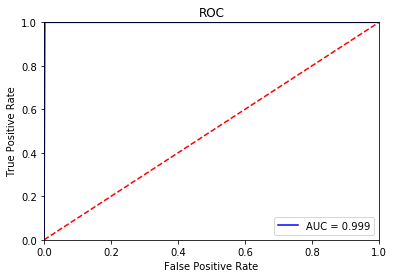

[0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0]


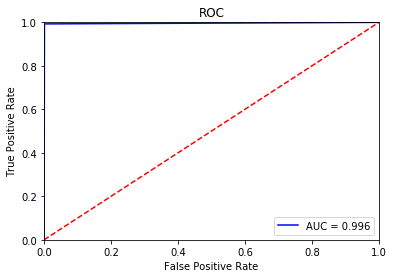

[1 0 0 ... 0 1 0] [1 0 0 ... 0 1 0]


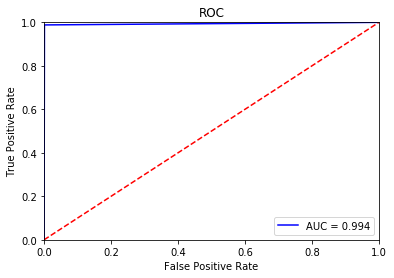

[0 0 0 ... 1 0 0] [0 0 0 ... 1 0 0]


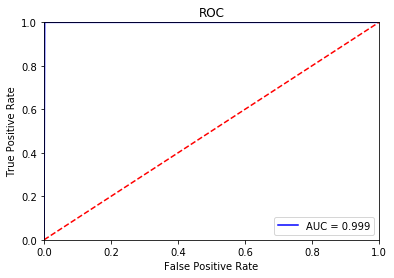

In [44]:
for i in range(4): #makes an ROC and calculates AUC for every gesture we are classifying for
    preds0,y0 = rBinaryC(i,preds,y_test2)
    print(preds0,y0)
    fpr, tpr, threshold = metrics.roc_curve(y0, preds0)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('ROC')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

The AUC curves for each sensor is giving us an area close to 1 which is a very good classification.

# Conclusion

We were able to do a good classification of the hand gestures using muscle activity. We believe we were able to get to this with the right approach to the dataset. It was important to know if the signals were due to movement or holding the gesture. So it helped us when we studied different literature to understand it. Knowing what EMG signals are and knowing what is noise in them helped greatly in the pre-processing stage which was followed by PCA. This laid the foundation for a neural network to fit the data well and to be able to classify the hand gestures with an average accuracy of 99.44% with cross-validation. The AUC curves that followed made our belief stronger that this indeed is a good model for classifying hand gestures using muscle acivity.

Having said this, this dataset has data that was sampled at 200 Hz which meant we had less data compared to the data that is usually received being sampled at 1000 Hz. For a data set that is sampled at 1000 Hz the peak itself is around 200 Hz, which would mean the filters that we put would differ when we get new data with a different sampling rate. Also, as a future course of action we would like to automate the process of finding the apt filter values to input. For this dataset, we had to manually look at graphs of each action corresponding to each sensor, then give filter values and then making the data pass through the filters. Finally, we would also like to improve the performance of the code. Right now, the code is not efficient and fast and could create problems when we have an extremely large dataset. For this particular dataset, and for data received with similar statistics and not an extremely large amount of data, this model is an extremely good one to use to classify hand gestures using muscle activity.

Studying EMG data and being able to classify gestures has a wide range of applications - 
- Simple prosthetics could likely be done using a similar algorithm classifying gestures.(e.g. clenching, rock, paper, scissor etc)
- Ideally in the future an algorithm could be used to predict and classify movements independently based upon a persons EMG readings. Would likely require a much higher sampling rate to be done.
- These kinds of readings could also be useful for data collection on athletes and musicians for training, data analysis, and educational purposes

Thus, we can say now that we have achieved what we had aimed for at the beginning of the project - to be able to classify hand gestures, and we believe we have done it with flying colors!